In [14]:
import os
import glob

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from dynamic_routing_analysis import decoding_utils #, plot_utils
import dynamic_routing_analysis as dra
import npc_lims

plt.rcParams['pdf.fonttype'] = 42 

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# set path to decoding results
# loadpath = dra.DECODING_ROOT_PATH / "new_annotations" / "linear_shift_20_units"
# loadpath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\shailaja\population_decoding"
# loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units_plus_all"
# loadpath=r"D:\decoding_results_from_CO\2024-10-11"
loadpath=r"D:\decoding_results_from_CO\logreg_many_n_units_medium_criteria_2025-01-08"
files=glob.glob(os.path.join(loadpath,'*_decoder_confidence*.pkl'))

In [10]:
# load all trialwise decoding results, option to concatenate all sessions
concat_session_results=False
save_tables=False
return_table=False

n_units='_20_units'

# loadpath = (
#     dra.DECODING_ROOT_PATH
#     / "new_annotations"
#     / "linear_shift_20_units"
#     / "combined" 
#     / "no_normalization"
# )
# loadpath=r"\\allen\programs\mindscope\workgroups\dynamicrouting\shailaja\population_decoding"
# loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_20_units_plus_all"
if save_tables:
    savepath=loadpath #os.path.join(loadpath,'combined')
else:
    savepath=None

if concat_session_results:
    combined_results=decoding_utils.concat_trialwise_decoder_results(files[0:1],savepath=savepath,return_table=return_table,n_units='all',single_session=True)
    if return_table:
        decoder_confidence_versus_response_type=combined_results[0]
        decoder_confidence_dprime_by_block=combined_results[1]
        decoder_confidence_by_switch=combined_results[2]
        decoder_confidence_versus_trials_since_rewarded_target=combined_results[3]
        decoder_confidence_before_after_target=combined_results[4]
else:
    # decoder_confidence_versus_response_type=pd.read_csv(os.path.join(loadpath,'decoder_confidence_versus_response_type.csv'))
    # decoder_confidence_dprime_by_block=pd.read_csv(os.path.join(loadpath,'decoder_confidence_dprime_by_block.csv'))
    # decoder_confidence_by_switch=pd.read_csv(os.path.join(loadpath,'decoder_confidence_by_switch.csv'))
    # decoder_confidence_versus_trials_since_rewarded_target=pd.read_csv(os.path.join(loadpath,'decoder_confidence_versus_trials_since_rewarded_target.csv'))
    # decoder_confidence_before_after_target=pd.read_csv(os.path.join(loadpath,'decoder_confidence_before_after_target.csv'))
    decoder_confidence_versus_response_type=pd.read_pickle(os.path.join(loadpath,'decoder_confidence_versus_response_type'+n_units+'.pkl'))
    decoder_confidence_dprime_by_block=pd.read_pickle(os.path.join(loadpath,'decoder_confidence_dprime_by_block'+n_units+'.pkl'))
    decoder_confidence_by_switch=pd.read_pickle(os.path.join(loadpath,'decoder_confidence_by_switch'+n_units+'.pkl'))
    decoder_confidence_versus_trials_since_rewarded_target=pd.read_pickle(os.path.join(loadpath,'decoder_confidence_versus_trials_since_rewarded_target'+n_units+'.pkl'))
    decoder_confidence_before_after_target=pd.read_pickle(os.path.join(loadpath,'decoder_confidence_before_after_target'+n_units+'.pkl'))
    decoder_confidence_all_trials=pd.read_pickle(os.path.join(loadpath,'decoder_confidence_all_trials'+n_units+'.pkl'))



In [ ]:
type(files[0:1])

## plot correct reject minus false alarm decoder confidence across areas

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15896\1287702840.py:26: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['vis_context_cr_fa_diff_sem'].append(stats.sem(sel_area['vis_cr_confidence']-sel_area['vis_fa_confidence']))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15896\1287702840.py:29: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['aud_context_cr_fa_diff_sem'].append(stats.sem(sel_area['aud_cr_confidence']-sel_area['aud_fa_confidence']))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15896\1287702840.py:33: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  cr_fa_diff_by_area['mean_diff_sem'].append(stats.sem(mean_diffs))
C:\Users\eth

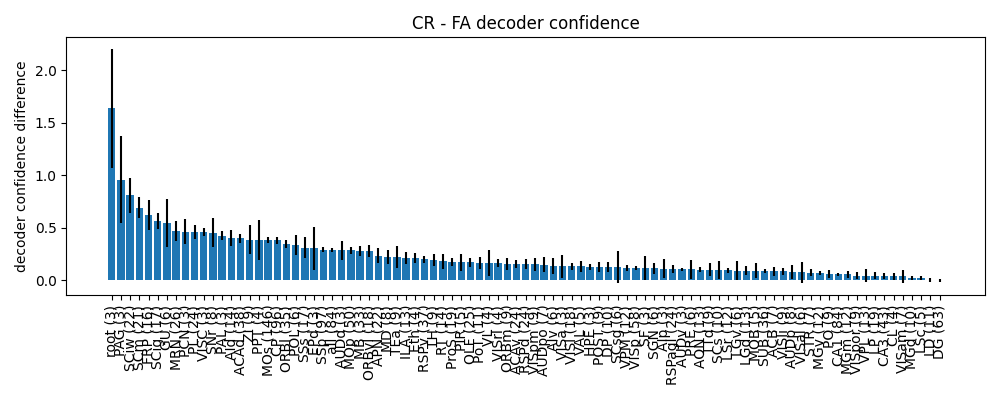

In [5]:
sel_project='DynamicRouting'
min_n_sessions=3
min_n_good_blocks=4

cr_fa_diff_by_area={
    'area':[],
    'n_sessions':[],
    'vis_context_dprime':[],
    'vis_context_cr_fa_diff':[],
    'vis_context_cr_fa_diff_sem':[],
    'aud_context_dprime':[],
    'aud_context_cr_fa_diff':[],
    'aud_context_cr_fa_diff_sem':[],
    'mean_diff':[],
    'mean_diff_sem':[],
    'total_diff':[],
}

for aa in decoder_confidence_versus_response_type['area'].unique():
    
    sel_area=decoder_confidence_versus_response_type.query('area==@aa and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')
    cr_fa_diff_by_area['area'].append(aa)
    cr_fa_diff_by_area['n_sessions'].append(len(sel_area))
    cr_fa_diff_by_area['vis_context_dprime'].append(np.mean(sel_area['vis_context_dprime']))
    cr_fa_diff_by_area['vis_context_cr_fa_diff'].append(np.mean(sel_area['vis_cr_confidence']-sel_area['vis_fa_confidence']))
    cr_fa_diff_by_area['vis_context_cr_fa_diff_sem'].append(stats.sem(sel_area['vis_cr_confidence']-sel_area['vis_fa_confidence']))
    cr_fa_diff_by_area['aud_context_dprime'].append(np.mean(sel_area['aud_context_dprime']))
    cr_fa_diff_by_area['aud_context_cr_fa_diff'].append(np.mean(sel_area['aud_cr_confidence']-sel_area['aud_fa_confidence']))
    cr_fa_diff_by_area['aud_context_cr_fa_diff_sem'].append(stats.sem(sel_area['aud_cr_confidence']-sel_area['aud_fa_confidence']))
    cr_fa_diff_by_area['mean_diff'].append(np.mean([cr_fa_diff_by_area['vis_context_cr_fa_diff'][-1],-cr_fa_diff_by_area['aud_context_cr_fa_diff'][-1]]))

    mean_diffs=(sel_area['vis_cr_confidence'].values+sel_area['aud_cr_confidence'].values)/2-(sel_area['vis_fa_confidence'].values+sel_area['aud_fa_confidence'].values)/2
    cr_fa_diff_by_area['mean_diff_sem'].append(stats.sem(mean_diffs))

    cr_fa_diff_by_area['total_diff'].append(np.sum([np.abs(cr_fa_diff_by_area['vis_context_cr_fa_diff'][-1]),np.abs(cr_fa_diff_by_area['aud_context_cr_fa_diff'][-1])]))


cr_fa_diff_by_area=pd.DataFrame(cr_fa_diff_by_area)

plot_data=cr_fa_diff_by_area.query('n_sessions>=@min_n_sessions').sort_values(by='mean_diff',ascending=False)

fig,ax=plt.subplots(figsize=(10,4))
ax.bar(plot_data['area'],plot_data['mean_diff'],yerr=plot_data['mean_diff_sem'])

area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_sessions'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')
ax.set_ylabel('decoder confidence difference')

ax.set_title('CR - FA decoder confidence')

fig.tight_layout()


## correct - incorrect decoder confidence across areas

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15896\573162211.py:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  correct_incorrect_diff_by_area['correct_incorrect_diff_sem'].append(stats.sem(sel_area['correct_confidence']-sel_area['incorrect_confidence']))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15896\573162211.py:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  correct_incorrect_diff_by_area['correct_incorrect_diff_sem'].append(stats.sem(sel_area['correct_confidence']-sel_area['incorrect_confidence']))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_15896\573162211.py:20: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  correct_incorrect_diff_by_area['correct_incorrect

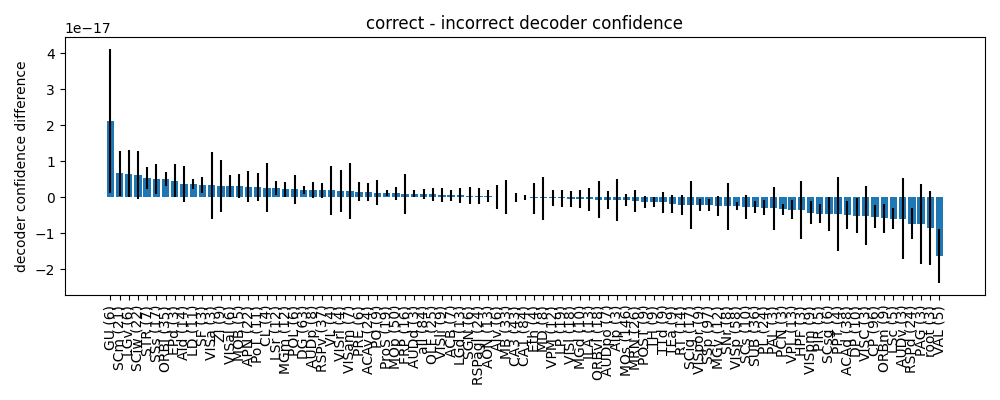

In [6]:
sel_project='DynamicRouting'
min_n_sessions=3
min_n_good_blocks=4

correct_incorrect_diff_by_area={
    'area':[],
    'n_sessions':[],
    'dprime':[],
    'correct_incorrect_diff':[],
    'correct_incorrect_diff_sem':[],

}

for aa in decoder_confidence_versus_response_type['area'].unique():
    sel_area=decoder_confidence_versus_response_type.query('area==@aa and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')
    correct_incorrect_diff_by_area['area'].append(aa)
    correct_incorrect_diff_by_area['n_sessions'].append(len(sel_area))
    correct_incorrect_diff_by_area['dprime'].append(np.mean(sel_area['overall_dprime']))
    correct_incorrect_diff_by_area['correct_incorrect_diff'].append(np.mean(sel_area['correct_confidence']-sel_area['incorrect_confidence']))
    correct_incorrect_diff_by_area['correct_incorrect_diff_sem'].append(stats.sem(sel_area['correct_confidence']-sel_area['incorrect_confidence']))

correct_incorrect_diff_by_area=pd.DataFrame(correct_incorrect_diff_by_area)

plot_data=correct_incorrect_diff_by_area.query('n_sessions>=@min_n_sessions').sort_values(by='correct_incorrect_diff',ascending=False)

fig,ax=plt.subplots(figsize=(10,4))
ax.bar(plot_data['area'],plot_data['correct_incorrect_diff'],yerr=plot_data['correct_incorrect_diff_sem'])

area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_sessions'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')
ax.set_ylabel('decoder confidence difference')
ax.set_title('correct - incorrect decoder confidence')

fig.tight_layout()


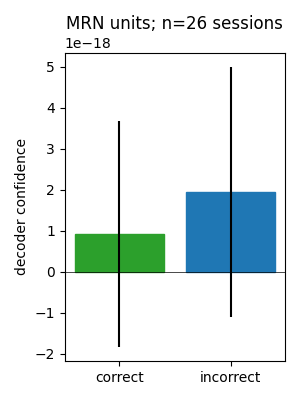

In [8]:
#correct vs. incorrect

#select area
aa='MRN'

sel_project='DynamicRouting'
min_n_recs=3
min_n_good_blocks=4

sel_area=decoder_confidence_versus_response_type.query('area==@aa and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')

fig,ax=plt.subplots(1,1,figsize=(3,4))
ax.axhline(0,color='k',linewidth=0.5)
bars=ax.bar([0,1],sel_area[['correct_confidence','incorrect_confidence',]].mean().values)
ax.errorbar([0,1],sel_area[['correct_confidence','incorrect_confidence']].mean().values,
            yerr=sel_area[['correct_confidence','incorrect_confidence',]].sem().values,linestyle='',color='k')
ax.set_xticks([0,1])
ax.set_xticklabels(['correct','incorrect'])
bars[0].set_color('tab:green')
bars[1].set_color('tab:blue')

ax.set_title(str(aa)+' units; n='+str(len(sel_area))+' sessions')
# ax.set_ylim([0,0.4])
ax.set_ylabel('decoder confidence')
fig.tight_layout()

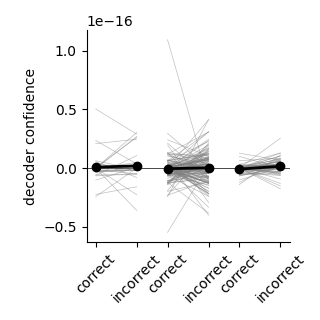

In [9]:
#compare multiple areas - raw vs. null decoding

area1='MRN'
area2='MOs'
area3='VISp'

sel_project='DynamicRouting'
min_n_recs=3
min_n_good_blocks=4

sel_area1=decoder_confidence_versus_response_type.query('area==@area1 and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')
sel_area2=decoder_confidence_versus_response_type.query('area==@area2 and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')
sel_area3=decoder_confidence_versus_response_type.query('area==@area3 and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')

fig,ax=plt.subplots(1,1,figsize=(3.2,3.2))
ax.axhline(0,color='k',linewidth=0.5)

ax.plot([0,1],[sel_area1['correct_confidence'],sel_area['incorrect_confidence']],'grey',alpha=0.5,linewidth=0.5)
ax.plot([0,1],[sel_area1['correct_confidence'].mean(),sel_area1['incorrect_confidence'].mean()],'k-o',linewidth=2)
ax.plot([1.75,2.75],[sel_area2['correct_confidence'],sel_area2['incorrect_confidence']],'grey',alpha=0.5,linewidth=0.5)
ax.plot([1.75,2.75],[sel_area2['correct_confidence'].mean(),sel_area2['incorrect_confidence'].mean()],'k-o',linewidth=2)
ax.plot([3.5,4.5],[sel_area3['correct_confidence'],sel_area3['incorrect_confidence']],'grey',alpha=0.5,linewidth=0.5)
ax.plot([3.5,4.5],[sel_area3['correct_confidence'].mean(),sel_area3['incorrect_confidence'].mean()],'k-o',linewidth=2)

ax.set_xticks([0,1,1.75,2.75,3.5,4.5])
ax.set_xticklabels(['correct','incorrect','correct','incorrect','correct','incorrect'],rotation=45)

ax.set_ylabel('decoder confidence')

#remove spines
# ax.set_ylim([-0.1,0.6])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

In [10]:
# #save figure
# savepath=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\quick figures\2024-09-25-plots_for_SFN_poster"
# fig.savefig(os.path.join(savepath,area1+'_'+area2+'_'+area3+'_decoder_confidence_.png'),format='png',dpi=600)

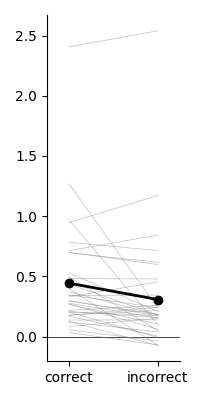

In [8]:
##plot single area

area1='MRN'

sel_project='DynamicRouting'
min_n_recs=3
min_n_good_blocks=4

sel_area1=decoder_confidence_versus_response_type.query('area==@area1 and n_good_blocks>=@min_n_good_blocks and project.str.contains(@sel_project)')

fig,ax=plt.subplots(1,1,figsize=(2,4))
ax.axhline(0,color='k',linewidth=0.5)

ax.plot([0,1],[sel_area1['correct_confidence'],sel_area1['incorrect_confidence']],'grey',alpha=0.5,linewidth=0.5)
ax.plot([0,1],[sel_area1['correct_confidence'].mean(),sel_area1['incorrect_confidence'].mean()],'k-o',linewidth=2)

ax.set_xticks([0,1])
ax.set_xticklabels(['correct','incorrect'])

#remove spines
# ax.set_ylim([-0.2,0.6])
ax.set_xlim(-0.25,1.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

In [7]:
##TODO: plot/validate other trialwise analyses

## plot predict probability

In [13]:
decoder_confidence_all_trials

,session,area,project,probe,cross_modal_dprime,n_good_blocks,trial_index,confidence,predict_proba,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,n_units
0,620263_2022-07-26,DG,TempletonPilotSession,,NaN,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.633973551020234, 0.1897283509118274, 0.5583...","[0.598842891868319, 0.5214440346869513, 0.5768...",8310.542169,2863.253012,3189.759036,83
1,620263_2022-07-26,CA1,TempletonPilotSession,B,NaN,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.017825619377879725, 0.8728142699133936, 2....","[0.48939906821085727, 0.6804677444769616, 0.70...",8389.552239,1892.164179,3311.940299,67
2,620263_2022-07-26,VISp,TempletonPilotSession,,NaN,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.0718289188854475, 1.3397289381630912, 0.739...","[0.7069663181522203, 0.6903215523241844, 0.646...",8379.956897,1102.370690,3442.456897,116
3,620263_2022-07-26,CA1,TempletonPilotSession,C,NaN,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[2.495746654757283, 0.7644917603779223, 0.7666...","[0.8057202563844331, 0.6312865257072598, 0.647...",8327.397260,3666.780822,1863.698630,146
4,620263_2022-07-26,TEa,TempletonPilotSession,,NaN,0,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9152233240747419, 0.7419807793278537, 1.302...","[0.6683237038454021, 0.6423792180255531, 0.764...",8640.217391,2378.260870,1814.492754,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,742903_2024-10-24,MOp,DynamicRouting,,2.339739,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.14579500653781602, -0.3358121577512655, -0...","[0.4786210976389054, 0.4183672811744888, 0.329...",4101.056338,2594.014085,3239.084507,142
16,742903_2024-10-24,all,DynamicRouting,,2.339739,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-1.220148078728816, -1.713272540241461, -1.88...","[0.30197712681691136, 0.23911392657725666, 0.2...",6452.969208,3147.140762,2822.452346,1365
17,742903_2024-10-24,CA1,DynamicRouting,all,2.339739,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-2.7676298934815686, -3.1577544236939947, -2....","[0.11693431648689862, 0.13171468343517556, 0.1...",7710.416667,2355.208333,2661.458333,48
18,742903_2024-10-24,CP,DynamicRouting,all,2.339739,5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.11377123324703266, -1.1734378721406766, -1...","[0.5159826789392902, 0.31359777422240637, 0.26...",5323.052960,4030.841121,3302.414330,321


In [102]:
#initialize dict
context_switch_predict_proba={
    'area':[],
    'session_id':[],
    'switch_index':[],
    'trial_index':[],
    'context_before':[],
    'context_after':[],
    'dprime_before':[],
    'dprime_after':[],
    'ccf_ap_mean':[],
    'ccf_dv_mean':[],
    'ccf_ml_mean':[],
    'predict_proba':[],
    'n_units':[],
}

sel_project='DynamicRouting'
unique_sessions=decoder_confidence_all_trials.query('project==@sel_project')['session'].unique()

# #for each unique session
for session_id in unique_sessions:

    # session_id=unique_sessions[0]

    session_confidence=decoder_confidence_all_trials.query('session==@session_id and (probe=="" or probe=="all")')

    #load trials table & performance table
    trials=pd.read_parquet(npc_lims.get_cache_path('trials',version='0.0.265',session_id=session_id))
    performance=pd.read_parquet(npc_lims.get_cache_path('performance',version='0.0.265',session_id=session_id))

    #find block switches
    block_switches=trials.query('is_context_switch').index.values

    #for each area (not including those with probe letters)
    session_areas=session_confidence['area'].unique()

    for aa in session_areas:
        # aa=session_areas[0]
        area_confidence=session_confidence.query('area==@aa')

        #for each switch
        for ss,switch in enumerate(block_switches):
            # switch=block_switches[0]
            # ss=0
            dprime_before=performance['cross_modal_dprime'].iloc[ss]
            dprime_after=performance['cross_modal_dprime'].iloc[ss+1]
            context_before=trials['context_name'].iloc[switch-1]
            context_after=trials['context_name'].iloc[switch]

            #save variables
            context_switch_predict_proba['area'].append(aa)
            context_switch_predict_proba['session_id'].append(session_id)
            context_switch_predict_proba['switch_index'].append(ss)
            context_switch_predict_proba['trial_index'].append(switch)
            context_switch_predict_proba['context_before'].append(context_before)
            context_switch_predict_proba['context_after'].append(context_after)
            context_switch_predict_proba['dprime_before'].append(dprime_before)
            context_switch_predict_proba['dprime_after'].append(dprime_after)
            context_switch_predict_proba['ccf_ap_mean'].append(area_confidence['ccf_ap_mean'].values)
            context_switch_predict_proba['ccf_dv_mean'].append(area_confidence['ccf_dv_mean'].values)
            context_switch_predict_proba['ccf_ml_mean'].append(area_confidence['ccf_ml_mean'].values)
            context_switch_predict_proba['predict_proba'].append(area_confidence['predict_proba'].values[0][switch-20:switch+30])
            context_switch_predict_proba['n_units'].append(area_confidence['n_units'].values[0])

            
context_switch_predict_proba=pd.DataFrame(context_switch_predict_proba)



In [103]:
# fig,ax=plt.subplots()
# ax.plot(context_switch_predict_proba['predict_proba'][0])
area_confidence['n_units'].values[0]

296

In [105]:
context_switch_predict_proba

,area,session_id,switch_index,trial_index,context_before,context_after,dprime_before,dprime_after,ccf_ap_mean,ccf_dv_mean,ccf_ml_mean,predict_proba,n_units
0,VPM,626791_2022-08-15,0,87,vis,aud,2.974365,1.991225,[6991.3865546218485],[4653.781512605042],[4351.470588235294],"[0.6222744915749683, 0.6627787004972469, 0.528...",119
1,VPM,626791_2022-08-15,1,159,aud,vis,1.991225,1.373955,[6991.3865546218485],[4653.781512605042],[4351.470588235294],"[0.45435337054471975, 0.5915108325017466, 0.35...",119
2,VPM,626791_2022-08-15,2,245,vis,aud,1.373955,0.000000,[6991.3865546218485],[4653.781512605042],[4351.470588235294],"[0.7030938879933233, 0.5560319517659117, 0.548...",119
3,VPM,626791_2022-08-15,3,317,aud,vis,0.000000,1.774796,[6991.3865546218485],[4653.781512605042],[4351.470588235294],"[0.4292908239746323, 0.43131697939198743, 0.66...",119
4,VPM,626791_2022-08-15,4,404,vis,aud,1.774796,2.112518,[6991.3865546218485],[4653.781512605042],[4351.470588235294],"[0.6941094855638785, 0.7519585322644058, 0.818...",119
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9035,SSp,742903_2024-10-24,0,90,aud,vis,3.875863,2.549420,[6422.972972972973],[2194.0033783783783],[2377.5337837837837],"[0.3408611939713645, 0.3097394190701912, 0.241...",296
9036,SSp,742903_2024-10-24,1,179,vis,aud,2.549420,3.212084,[6422.972972972973],[2194.0033783783783],[2377.5337837837837],"[0.5172283504401165, 0.5610881559417435, 0.498...",296
9037,SSp,742903_2024-10-24,2,268,aud,vis,3.212084,2.239216,[6422.972972972973],[2194.0033783783783],[2377.5337837837837],"[0.5189366848977672, 0.5080261966103164, 0.490...",296
9038,SSp,742903_2024-10-24,3,354,vis,aud,2.239216,2.856932,[6422.972972972973],[2194.0033783783783],[2377.5337837837837],"[0.5666555986526827, 0.642015286752171, 0.6316...",296


In [106]:
context_switch_predict_proba['area'].unique()

array(['VPM', 'PO', 'LP', 'LD', 'RSPd', 'LGd', 'VISpm', 'AUDp', 'AUDpo',
       'TEa', 'STR', 'CP', 'MOs', 'all', 'CA1', 'DG', 'NB', 'CA3', 'ProS',
       'VISp', 'PoT', 'SGN', 'VISam', 'VISli', 'VISl', 'MOp', 'PAL',
       'SUB', 'AIv', 'AId', 'ACB', 'VL', 'VISal', 'PIR', 'ACAd', 'RSPagl',
       'VISrl', 'ORBl', 'Eth', 'POL', 'MGv', 'MGd', 'RT', 'SSp', 'VISa',
       'PPN', 'ICd', 'MRN', 'POST', 'MGm', 'LSr', 'MB', 'SAG', 'ICe',
       'RSPv', 'VISpor', 'SCiw', 'SCsg', 'SCm', 'SCs', 'VPL', 'TH', 'SNr',
       'ZI', 'VM', 'VAL', 'PAG', 'SCig', 'APN', 'OT', 'EPd', 'root',
       'lot', 'FRP', 'ILA', 'ACAv', 'LSc', 'AUDd', 'SSs', 'MOB', 'ORBvl',
       'ORBm', 'PL', 'OLF', 'IG', 'MPT', 'LGv', 'BST', 'CL', 'LHA', 'MS',
       'SF', 'PR', 'AMv', 'GU', 'NPC', 'AON', 'DP', 'PPT', 'MD', 'TRS',
       'LH', 'MH', 'SH', 'AV', 'AD', 'CLA', 'PP', 'SCop', 'SMT', 'AMd',
       'IAD', 'RN', 'out of brain', 'PCN', 'PRE', 'V3', 'P', 'DR', 'CA2',
       'ECT6a', 'LSv', 'GPe', 'CS', 'PSTN', 'VPMpc', 'P

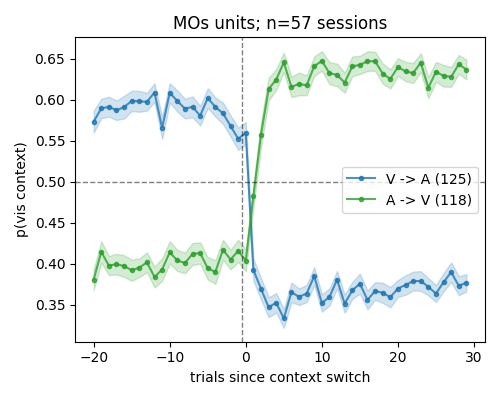

In [121]:
sel_area='MOs'
dprime_threshold=1.0

sel_data=context_switch_predict_proba.query('area==@sel_area and dprime_before>=@dprime_threshold and dprime_after>=@dprime_threshold')

vis_to_aud_switch_mean=np.mean(sel_data.query('context_before=="vis" and context_after=="aud"')['predict_proba'].values)
vis_to_aud_switch_sem=stats.sem(sel_data.query('context_before=="vis" and context_after=="aud"')['predict_proba'].values)
vis_to_aud_switch_n=len(sel_data.query('context_before=="vis" and context_after=="aud"'))
aud_to_vis_switch_mean=np.mean(sel_data.query('context_before=="aud" and context_after=="vis"')['predict_proba'].values)
aud_to_vis_switch_sem=stats.sem(sel_data.query('context_before=="aud" and context_after=="vis"')['predict_proba'].values)
aud_to_vis_switch_n=len(sel_data.query('context_before=="aud" and context_after=="vis"'))

xvect=np.arange(-20,30)

fig,ax=plt.subplots(figsize=(5,4))
ax.plot(xvect,vis_to_aud_switch_mean,color='tab:blue',marker='.',label=f'V -> A ({vis_to_aud_switch_n})',alpha=0.8)
ax.fill_between(xvect,vis_to_aud_switch_mean-vis_to_aud_switch_sem,vis_to_aud_switch_mean+vis_to_aud_switch_sem,alpha=0.2,color='tab:blue')
ax.plot(xvect,aud_to_vis_switch_mean,color='tab:green',marker='.',label=f'A -> V ({aud_to_vis_switch_n})',alpha=0.8)
ax.fill_between(xvect,aud_to_vis_switch_mean-aud_to_vis_switch_sem,aud_to_vis_switch_mean+aud_to_vis_switch_sem,alpha=0.2,color='tab:green')

ax.axvline(-0.5,color='k',linewidth=1.0,alpha=0.5,linestyle='--')
ax.axhline(0.5,color='k',linewidth=1.0,alpha=0.5,linestyle='--')

ax.set_xlabel('trials since context switch')
ax.set_ylabel('p(vis context)')
ax.legend()

ax.set_title(sel_area+' units; n='+str(len(sel_data.query('switch_index==0')))+' sessions')

fig.tight_layout()


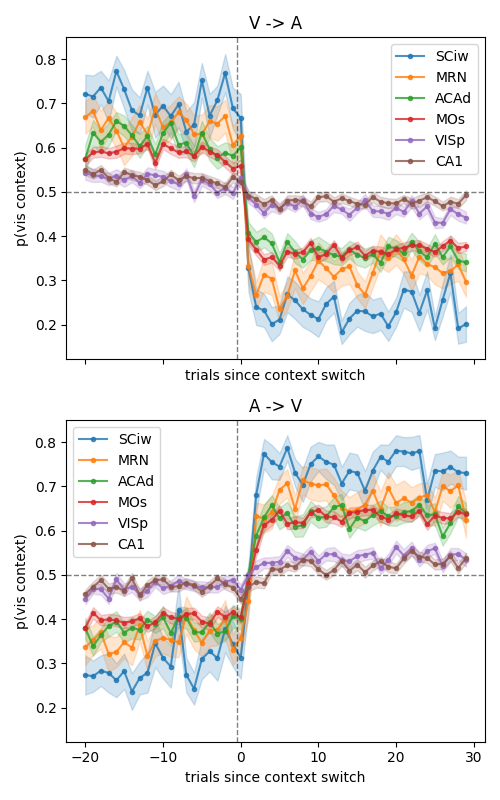

In [97]:
sel_areas=['SCiw','MRN','ACAd','MOs','VISp','CA1']
dprime_threshold=1.0

fig,ax=plt.subplots(2,1,figsize=(5,8),sharex=True,sharey=True)

for sel_area in sel_areas:

    sel_data=context_switch_predict_proba.query('area==@sel_area and dprime_before>=@dprime_threshold and dprime_after>=@dprime_threshold')

    vis_to_aud_switch_mean=np.mean(sel_data.query('context_before=="vis" and context_after=="aud"')['predict_proba'].values)
    vis_to_aud_switch_sem=stats.sem(sel_data.query('context_before=="vis" and context_after=="aud"')['predict_proba'].values)
    vis_to_aud_switch_n=len(sel_data.query('context_before=="vis" and context_after=="aud"'))
    aud_to_vis_switch_mean=np.mean(sel_data.query('context_before=="aud" and context_after=="vis"')['predict_proba'].values)
    aud_to_vis_switch_sem=stats.sem(sel_data.query('context_before=="aud" and context_after=="vis"')['predict_proba'].values)
    aud_to_vis_switch_n=len(sel_data.query('context_before=="aud" and context_after=="vis"'))

    line=ax[0].plot(xvect,vis_to_aud_switch_mean,marker='.',label=sel_area,alpha=0.8)
    ax[0].fill_between(xvect,vis_to_aud_switch_mean-vis_to_aud_switch_sem,vis_to_aud_switch_mean+vis_to_aud_switch_sem,alpha=0.2,color=line[0].get_color())

    line=ax[1].plot(xvect,aud_to_vis_switch_mean,marker='.',label=sel_area,alpha=0.8)
    ax[1].fill_between(xvect,aud_to_vis_switch_mean-aud_to_vis_switch_sem,aud_to_vis_switch_mean+aud_to_vis_switch_sem,alpha=0.2,color=line[0].get_color())

ax[0].axvline(-0.5,color='k',linewidth=1.0,alpha=0.5,linestyle='--')
ax[1].axvline(-0.5,color='k',linewidth=1.0,alpha=0.5,linestyle='--')

ax[0].axhline(0.5,color='k',linewidth=1.0,alpha=0.5,linestyle='--')
ax[1].axhline(0.5,color='k',linewidth=1.0,alpha=0.5,linestyle='--')

ax[0].set_xlabel('trials since context switch')
ax[0].set_ylabel('p(vis context)')
ax[0].set_title('V -> A')
ax[0].legend()

ax[1].set_xlabel('trials since context switch')
ax[1].set_ylabel('p(vis context)')
ax[1].set_title('A -> V')
ax[1].legend()

fig.tight_layout()
